In [1]:
df=pd.read_csv('50_startups.csv')
df.head()

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

<IPython.core.display.Javascript object>

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

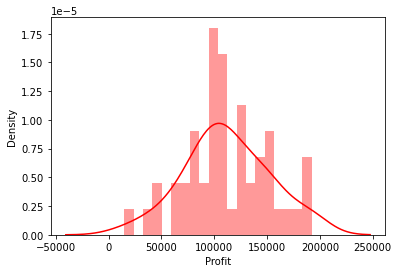

In [2]:
sns.distplot(df['Profit'],bins=20,color='red')

In [12]:
#sns.pairplot(df,hue='State',x_vars='Marketing Spend',y_vars='Profit',kind='scatter',palette='Reds',height=5)

<IPython.core.display.Javascript object>

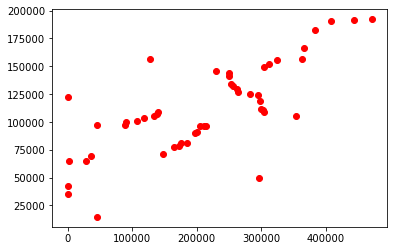

In [11]:
plt.scatter(df['Marketing Spend'],df['Profit'],c='r')

In [25]:
X=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [23]:
#label=LabelEncoder()

In [35]:
'''X[:, 3] = label.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categories=3)
X = onehotencoder.fit_transform(X).toarray()
'''

TypeError: object of type 'int' has no len()

In [38]:
# data=pd.to_numeric(df['State'],errors='coerce')
# data.head()

<IPython.core.display.Javascript object>

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: State, dtype: float64

In [41]:
# new_data=pd.concat([df,data],axis=1,join='outer')
# new_data.head()

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit,State
0,165349.20,136897.80,471784.10,New York,192261.83,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN


In [43]:
data=df.drop(['State'],axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred=lin.predict(x_test)
y_pred

array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

In [50]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [51]:
loss=y_test-y_pred
loss

array([  -677.02508021,  11860.66763306,  12592.91209852,   4840.54631686,
        11515.60262834, -10525.31584099,  13752.10152117,  -1020.80199396,
        -4436.91083781,  -2784.27909945])

In [52]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [54]:
mse

78413822.17201337

In [55]:
r2

0.9386861070938134

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Sales')

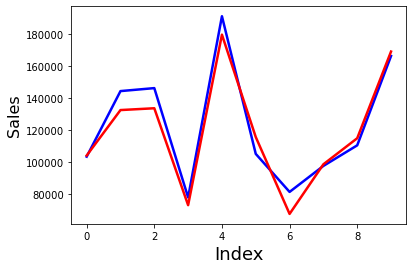

In [61]:
plt.plot(y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(y_pred, color="red",  linewidth=2.5, linestyle="-")              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)